In [1]:
import numpy as np # generic math functions
import matplotlib.pyplot as plt
#%matplotlib notebook
%matplotlib inline

In [2]:
from quspin.operators import commutator
from quspin.operators import hamiltonian # Hamiltonians and operators
from quspin.basis import spin_basis_1d # Hilbert space spin basis
import numpy as np # generic math functions

### Sanity check: commutator definition

In [15]:
def Ham_single(L):
    basis = spin_basis_1d(L)
    hz=5.0
    hx=10.0
    hz_arr = [[hz,i] for i in range(L)] # OBC
    hx_arr = [[hx,i] for i in range(L)] # OBC
    # static and dynamic lists
    static = [["z",hz_arr], ["x",hx_arr] ]
    dynamic =[]
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.complex_)
    return H


def del_lambda_Ham_single(L):
    basis = spin_basis_1d(L)
    hx_lamb=1.0
    hx_lamb_arr = [[hx_lamb,i] for i in range(L)] # OBC
    static_lamb = [["x",hx_lamb_arr]]
    dynamic_lamb =[]
    op_lamb=hamiltonian(static_lamb,dynamic_lamb,basis=basis,dtype=np.complex_)
    return op_lamb

In [11]:
L=1
H=Ham(L)
partial_lamb_H=del_lambda_Ham_single(L)
print commutator(H,partial_lamb_H).toarray()
#mat=((-1j*comm)**2).toarray()
#print np.trace(mat)/2**L, 4*2*(L-1)

Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
[[  0.+0.j -10.+0.j]
 [ 10.+0.j   0.+0.j]]


In [8]:
print partial_lamb_H.toarray()
print H.toarray()

[[ 0.+0.j  1.+0.j]
 [ 1.+0.j  0.+0.j]]
[[ -5.+0.j  10.+0.j]
 [ 10.+0.j   5.+0.j]]


In [12]:
lambda_H=partial_lamb_H.toarray()
H=H.toarray()    

In [15]:
np.dot(lambda_H, H)-np.dot( H, lambda_H)

array([[  0.+0.j,  10.+0.j],
       [-10.+0.j,   0.+0.j]])

### Sanity check:  finding gauge potn of single body using $C^{(n)}$ formula

In [13]:
def term(comm, mu, n):
    return (-1)**n*comm/mu**(2*n+2)

def norm(A_lamb):    
    return np.linalg.norm(A_lamb, 'fro')

def commutator_op(A, B):    
    return np.dot(A, B)-np.dot(B, A)

In [26]:
mu=1.0
tot=1
####
####
L=1
 
sum_temp=0
H=Ham_single(L).toarray()
partial_lamb_H=del_lambda_Ham_single(L).toarray()
comm_temp=commutator_op(H,partial_lamb_H)
print comm_temp
for i in range(3):
    sum_temp+=term(comm_temp,mu,i)
    comm_temp=commutator_op(H,commutator_op(H,comm_temp))
    #print norm(sum_temp)
    print i, comm_temp


Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
[[  0.+0.j -10.+0.j]
 [ 10.+0.j   0.+0.j]]
0 [[    0.+0.j -5000.+0.j]
 [ 5000.+0.j     0.+0.j]]
1 [[       0.+0.j -2500000.+0.j]
 [ 2500000.+0.j        0.+0.j]]
2 [[  0.00000000e+00+0.j  -1.25000000e+09+0.j]
 [  1.25000000e+09+0.j   0.00000000e+00+0.j]]


In [30]:
H=Ham_single(L).toarray()
partial_lamb_H=del_lambda_Ham_single(L).toarray()
comm_temp=commutator_op(H,partial_lamb_H)
print comm_temp
print commutator_op(H,comm_temp)

Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
[[  0.+0.j -10.+0.j]
 [ 10.+0.j   0.+0.j]]
[[ 200.+0.j  100.+0.j]
 [ 100.+0.j -200.+0.j]]


### Approximate gauge potential

In [8]:
def Ham_nonint(L):
    basis = spin_basis_1d(L)
    hz=(np.sqrt(5)+1)/4 #parameters used by Kim and Huse
    hx=(np.sqrt(5)+5)/8
    J=1.0
    hz_arr = [[hz,i] for i in range(L)] 
    hx_arr = [[hx,i] for i in range(L)] 
    J_arr =[[J,i,(i+1)] for i in range(L-1)] # OBC  [[J,i,(i+1)%L] for i in range(L)] # PBC
    
    # static and dynamic lists
    static = [["zz",J_arr],["z",hz_arr], ["x",hx_arr] ]
    dynamic =[]
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.float_,check_symm=False,check_herm=False)
    return H

def del_lambda_Ham(L):
    basis = spin_basis_1d(L)  
    hx_lamb=1.0
    hx_lamb_arr = [[hx_lamb,i] for i in range(L)] 
    static_lamb = [["x",hx_lamb_arr]]
    dynamic_lamb =[]
    op_lamb=hamiltonian(static_lamb,dynamic_lamb,basis=basis,dtype=np.float_,check_symm=False,check_herm=False)
    return op_lamb

def term(comm, mu, n):
    return (-1)**n*comm/mu**(2*n+2)

def norm(A_lamb):    
    return np.linalg.norm(A_lamb, 'fro')

def commutator_op(A, B):    
    return 1.0#np.dot(A, B)-np.dot(B, A)

In [70]:
mu=4.0
tot=9
####
####
L=2
norm_arr_small_mu=np.zeros(tot)
L_arr=np.zeros(tot)
for j in range(tot):
    sum_temp=0
    H=Ham_nonint(L).toarray()
    partial_lamb_H=del_lambda_Ham(L).toarray()
    comm_temp=commutator_op(H,partial_lamb_H)
    for i in range(L+1):
        sum_temp+=term(comm_temp,mu,i)
        comm_temp=commutator_op(H,commutator_op(H,comm_temp))
        #print 'i',L, i
    norm_arr_small_mu[j]=norm(sum_temp)**2/2**L
    L_arr[j]=L
    print L_arr[j], norm_arr_small_mu[j]
    L+=1

2.0 0.219837161049
3.0 27.4064505694
4.0 2042.17661584
5.0 159509.365491
6.0 16946189.0032
7.0 2594163208.74
8.0 544298515918.0
9.0 1.46735538714e+14
10.0 4.90301986709e+16


In [71]:
mu=10.0
tot=9
####
####
L=2
norm_arr_big_mu=np.zeros(tot)
L_arr=np.zeros(tot)
for j in range(tot):
    sum_temp=0
    H=Ham_nonint(L).toarray()
    partial_lamb_H=del_lambda_Ham(L).toarray()
    comm_temp=commutator_op(H,partial_lamb_H)
    for i in range(L+1):
        sum_temp+=term(comm_temp,mu,i)
        comm_temp=commutator_op(H,commutator_op(H,comm_temp))
        #print 'i',L, i
    norm_arr_big_mu[j]=norm(sum_temp)**2/2**L
    L_arr[j]=L
    #print 'j', j,  L_arr[j], norm_arr[j]
    L+=1

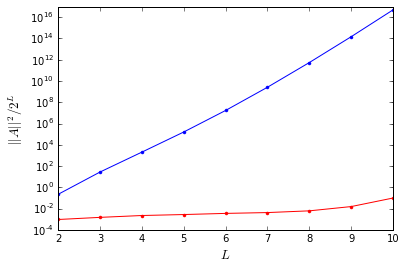

In [77]:
plt.semilogy(L_arr, norm_arr_small_mu, 'b.-')
plt.semilogy(L_arr, norm_arr_big_mu, 'r.-')
plt.ylabel(r'$||A||^2/2^L$', fontsize=13)
plt.xlabel(r'$L$', fontsize=13)

Run a few more sanity checks and then see what's happening.